In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# user_input = input("Enter your search query: ")
user_input = input("Enter your search query: ")

# Yahoo News search
yahoo_url = f"https://news.search.yahoo.com/search?p={user_input}"
yahoo_response = requests.get(yahoo_url)
yahoo_soup = BeautifulSoup(yahoo_response.content, "html.parser")

yahoo_titles = yahoo_soup.find_all("h4", class_="s-title")
yahoo_summaries = yahoo_soup.find_all("p", class_="s-desc")

yahoo_results = []

for i in range(len(yahoo_titles)):
    title = yahoo_titles[i].text.strip()
    summary = yahoo_summaries[i].text.strip()
    yahoo_results.append({"title": title, "summary": summary, "source": "Yahoo News"})


# Create dataframe
results = yahoo_results 
df = pd.DataFrame(results)

df.head()


,title,summary,source
0,Carl Icahn's business empire just became Hinde...,Research disclosed a short position against Ca...,Yahoo News
1,Adani Wilmar Q4 results: Profit for Adani grou...,Adani Wilmar said its revenue from operations ...,Yahoo News
2,Adani Power Q4 FY23 results: Net profit soars ...,"In a regulatory filing, the company said its c...",Yahoo News
3,"Adani Wilmar, Adani Enterprises, Adani Total, ...",Shares of Adani Total Gas have cracked 74.40 p...,Yahoo News
4,"MSCI slashes free float for 2 Adani firms, her...",After battling the stock market rout triggered...,Yahoo News


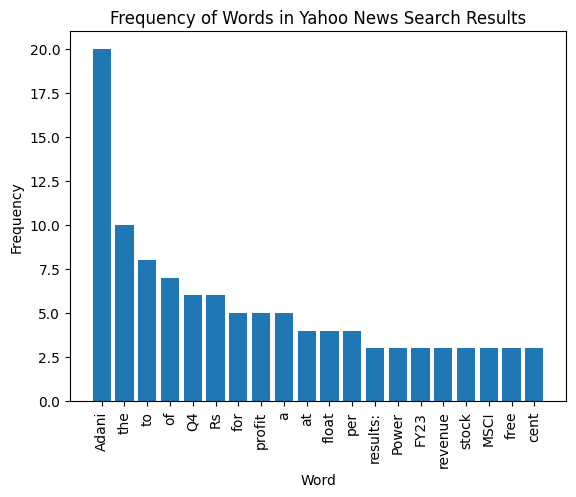

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

# Join all titles and summaries into a single string
text = " ".join(df["title"].tolist() + df["summary"].tolist())

# Split the text into individual words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create a bar chart of the 20 most common words
most_common_words = word_counts.most_common(20)
x = [word[0] for word in most_common_words]
y = [word[1] for word in most_common_words]
plt.bar(x, y)
plt.title("Frequency of Words in Yahoo News Search Results")
plt.xlabel("Word")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


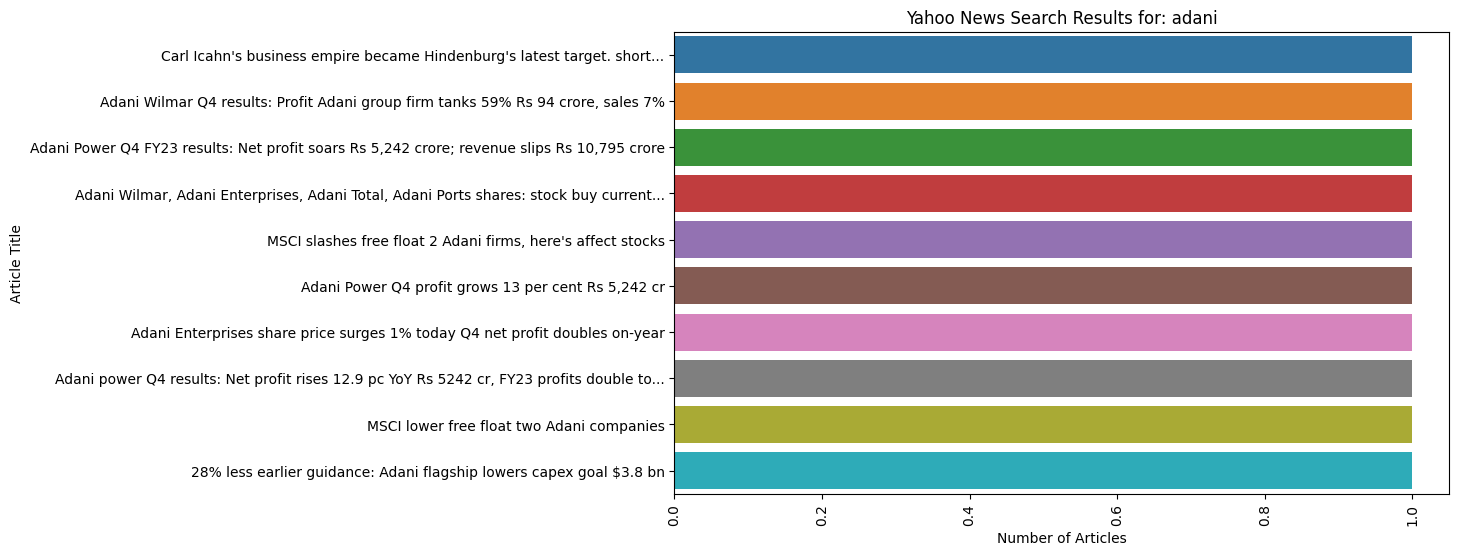

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

user_input = input("Enter your search query: ")

# Yahoo News search
yahoo_url = f"https://news.search.yahoo.com/search?p={user_input}"
yahoo_response = requests.get(yahoo_url)
yahoo_soup = BeautifulSoup(yahoo_response.content, "html.parser")

yahoo_titles = yahoo_soup.find_all("h4", class_="s-title")
yahoo_summaries = yahoo_soup.find_all("p", class_="s-desc")

yahoo_results = []

# Remove stop words from titles and summaries
stop_words = set(stopwords.words('english'))
for i in range(len(yahoo_titles)):
    title = yahoo_titles[i].text.strip()
    summary = yahoo_summaries[i].text.strip()

    title_words = title.split()
    title = " ".join([word for word in title_words if word.lower() not in stop_words])

    summary_words = summary.split()
    summary = " ".join([word for word in summary_words if word.lower() not in stop_words])

    yahoo_results.append({"title": title, "summary": summary, "source": "Yahoo News"})

# Create dataframe
results = yahoo_results
df_1 = pd.DataFrame(results)

# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(y="title", data=df_1)
plt.xlabel("Number of Articles")
plt.ylabel("Article Title")
plt.title("Yahoo News Search Results for: " + user_input)
plt.xticks(rotation=90)
plt.show()


In [5]:
df_1

,title,summary,source
0,Carl Icahn's business empire became Hindenburg...,Research disclosed short position Carl Icahn's...,Yahoo News
1,Adani Wilmar Q4 results: Profit Adani group fi...,Adani Wilmar said revenue operations dropped 7...,Yahoo News
2,Adani Power Q4 FY23 results: Net profit soars ...,"regulatory filing, company said consolidated t...",Yahoo News
3,"Adani Wilmar, Adani Enterprises, Adani Total, ...",Shares Adani Total Gas cracked 74.40 per cent ...,Yahoo News
4,"MSCI slashes free float 2 Adani firms, here's ...",battling stock market rout triggered Hindenbur...,Yahoo News
5,"Adani Power Q4 profit grows 13 per cent Rs 5,2...","Q4 FY23, APL achieved average consolidated PLF...",Yahoo News
6,Adani Enterprises share price surges 1% today ...,Adani Enterprises shares risen 13% past one mo...,Yahoo News
7,Adani power Q4 results: Net profit rises 12.9 ...,Adani Power reported 12.9 percent rise net pro...,Yahoo News
8,MSCI lower free float two Adani companies,MSCI sees Adani Total Gas' free float 14% Adan...,Yahoo News
9,28% less earlier guidance: Adani flagship lowe...,Adani’s transportation vertical comprising air...,Yahoo News


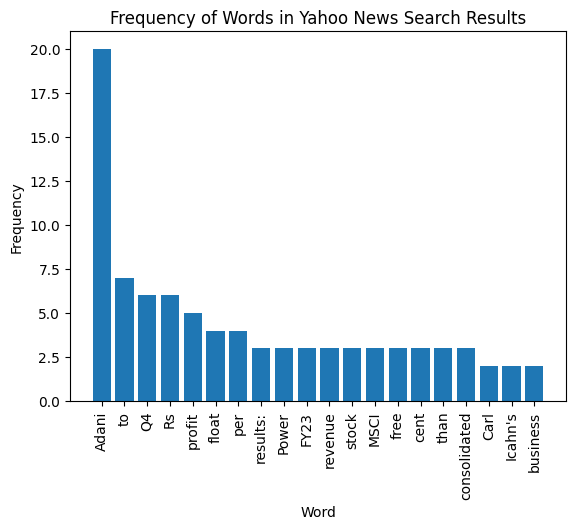

In [6]:
text = " ".join(df["title"].tolist() + df_1["summary"].tolist())

# Split the text into individual words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create a bar chart of the 20 most common words
most_common_words = word_counts.most_common(20)
x = [word[0] for word in most_common_words]
y = [word[1] for word in most_common_words]
plt.bar(x, y)
plt.title("Frequency of Words in Yahoo News Search Results")
plt.xlabel("Word")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
search_term = input("Enter a search term: ")
# Get user input for the URL
url = f'https://hindenburgresearch.com/{search_term}'
response = requests.get(url)
# Send a GET request to the URL and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract all headers and their related paragraphs
headers = {}
current_header = None
for element in soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p']):
    if element.name.startswith('h'):
        # If a new header is found, update the current header
        current_header = element.text.strip()
        headers[current_header] = []
    elif current_header is not None:
        # If a paragraph is found, add it to the list of paragraphs for the current header
        headers[current_header].append(element.text.strip())

# Create a list of dictionaries with the title, summary and source information
data = []
for header, paragraphs in headers.items():
    data.append({
        'title': header,
        'summary': ' '.join(paragraphs),
        'source': url
    })

# Create a dataframe from the list of dictionaries
df = pd.DataFrame(data)

# Print the dataframe
print(df)


                                                 title  \
0    Adani Group: How The World’s 3rd Richest Man I...   
1       GET OUR LATEST REPORTS DELIVERED TO YOUR INBOX   
2                                         Introduction   
3    Background On Adani Group, One Of India’s Larg...   
4    The 7 Listed Companies Of Adani Group Are 85%+...   
..                                                 ...   
136  Adani Group “Harasses” Critics And “Manipulate...   
137               Conclusion: Growth With Transparency   
138  Appendix 1: Vinod Adani’s Involvement in At Le...   
139  Disclosure: We Are Short Adani Group Through U...   
140                                   Legal Disclaimer   

                                               summary  \
0                                                        
1    Initial Disclosure: After extensive research, ...   
2    India is home to many of the world’s most bril...   
3    Adani Group is the 2nd largest conglomerate in...   
4    Even bef

In [8]:
df

,title,summary,source
0,Adani Group: How The World’s 3rd Richest Man I...,,https://hindenburgresearch.com/adani
1,GET OUR LATEST REPORTS DELIVERED TO YOUR INBOX,"Initial Disclosure: After extensive research, ...",https://hindenburgresearch.com/adani
2,Introduction,India is home to many of the world’s most bril...,https://hindenburgresearch.com/adani
3,"Background On Adani Group, One Of India’s Larg...",Adani Group is the 2nd largest conglomerate in...,https://hindenburgresearch.com/adani
4,The 7 Listed Companies Of Adani Group Are 85%+...,Even before examining the evidence put forward...,https://hindenburgresearch.com/adani
...,...,...,...
136,Adani Group “Harasses” Critics And “Manipulate...,The Adani Group started a series of libel acti...,https://hindenburgresearch.com/adani
137,Conclusion: Growth With Transparency,A system is broken when corporate behemoths li...,https://hindenburgresearch.com/adani
138,Appendix 1: Vinod Adani’s Involvement in At Le...,After cataloguing the entire Mauritius corpora...,https://hindenburgresearch.com/adani
139,Disclosure: We Are Short Adani Group Through U...,,https://hindenburgresearch.com/adani


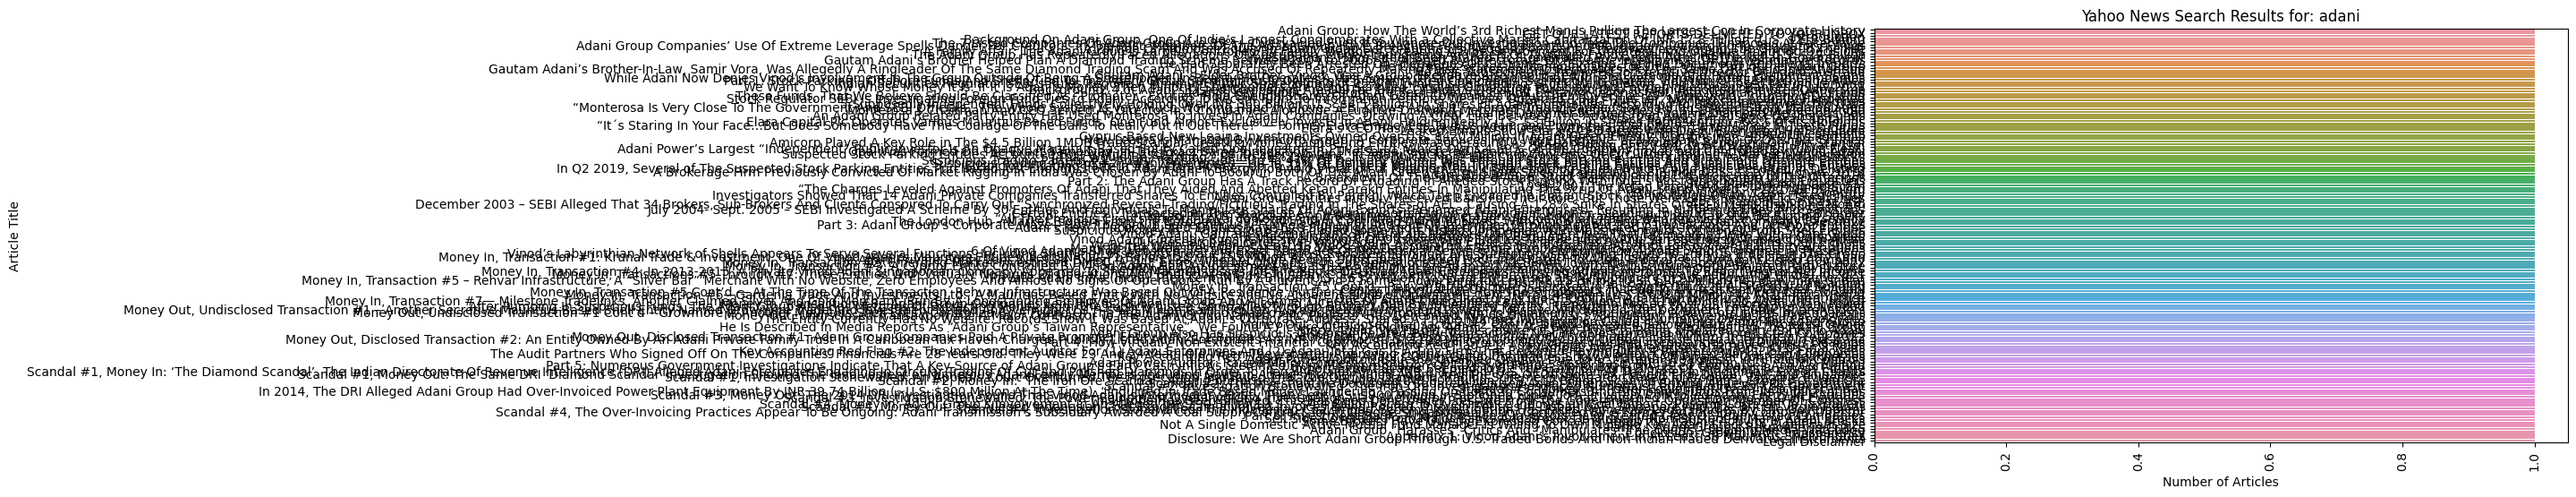

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(y="title", data=df)
plt.xlabel("Number of Articles")
plt.ylabel("Article Title")
plt.title("Yahoo News Search Results for: " + user_input)
plt.xticks(rotation=90)
plt.show()

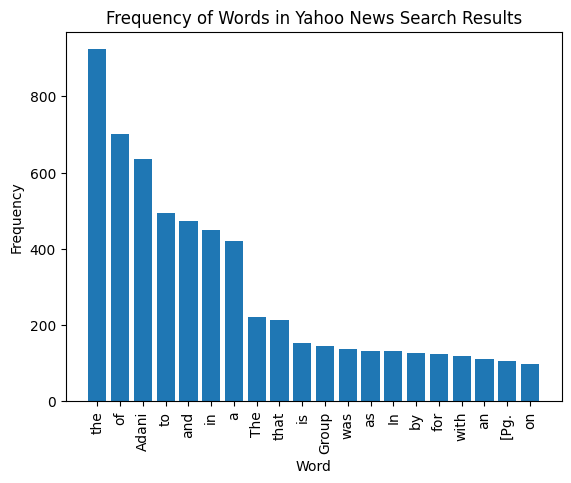

In [10]:
text = " ".join(df["title"].tolist() + df["summary"].tolist())

# Split the text into individual words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create a bar chart of the 20 most common words
most_common_words = word_counts.most_common(20)
x = [word[0] for word in most_common_words]
y = [word[1] for word in most_common_words]
plt.bar(x, y)
plt.title("Frequency of Words in Yahoo News Search Results")
plt.xlabel("Word")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

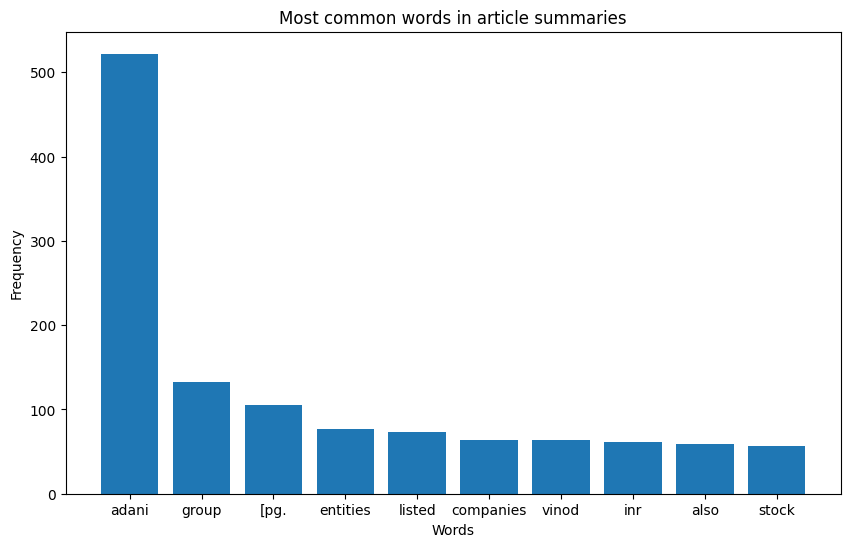

In [11]:
df['summary'] = df['summary'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

# Count word frequency in summary column
word_counts = Counter()
df['summary'].str.split().apply(word_counts.update)

# Plot word frequency
plt.figure(figsize=(10, 6))
plt.bar(*zip(*word_counts.most_common(10)))
plt.title('Most common words in article summaries')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

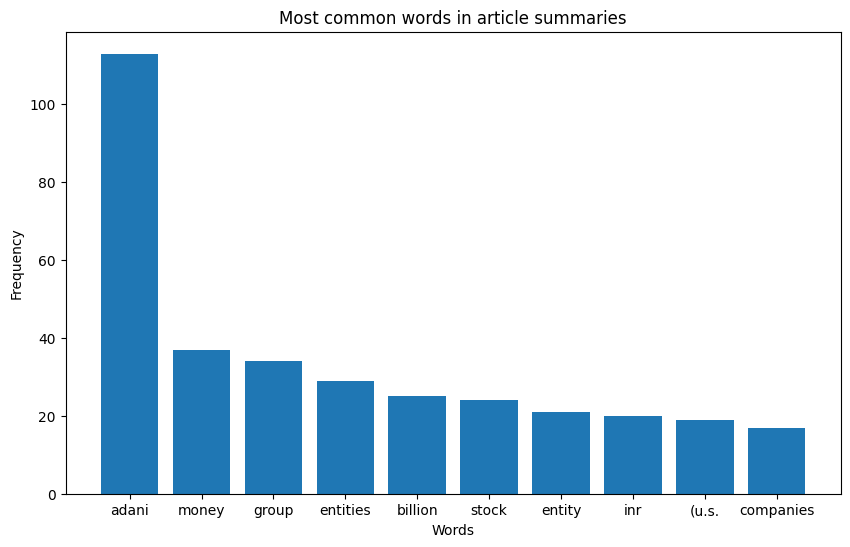

In [12]:
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

# Count word frequency in summary column
word_counts = Counter()
df['title'].str.split().apply(word_counts.update)

# Plot word frequency
plt.figure(figsize=(10, 6))
plt.bar(*zip(*word_counts.most_common(10)))
plt.title('Most common words in article summaries')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [13]:
df_1

,title,summary,source
0,Carl Icahn's business empire became Hindenburg...,Research disclosed short position Carl Icahn's...,Yahoo News
1,Adani Wilmar Q4 results: Profit Adani group fi...,Adani Wilmar said revenue operations dropped 7...,Yahoo News
2,Adani Power Q4 FY23 results: Net profit soars ...,"regulatory filing, company said consolidated t...",Yahoo News
3,"Adani Wilmar, Adani Enterprises, Adani Total, ...",Shares Adani Total Gas cracked 74.40 per cent ...,Yahoo News
4,"MSCI slashes free float 2 Adani firms, here's ...",battling stock market rout triggered Hindenbur...,Yahoo News
5,"Adani Power Q4 profit grows 13 per cent Rs 5,2...","Q4 FY23, APL achieved average consolidated PLF...",Yahoo News
6,Adani Enterprises share price surges 1% today ...,Adani Enterprises shares risen 13% past one mo...,Yahoo News
7,Adani power Q4 results: Net profit rises 12.9 ...,Adani Power reported 12.9 percent rise net pro...,Yahoo News
8,MSCI lower free float two Adani companies,MSCI sees Adani Total Gas' free float 14% Adan...,Yahoo News
9,28% less earlier guidance: Adani flagship lowe...,Adani’s transportation vertical comprising air...,Yahoo News


In [14]:
df

,title,summary,source
0,adani group: world’s 3rd richest man pulling l...,,https://hindenburgresearch.com/adani
1,get latest reports delivered inbox,"initial disclosure: extensive research, taken ...",https://hindenburgresearch.com/adani
2,introduction,india home many world’s brilliant entrepreneur...,https://hindenburgresearch.com/adani
3,"background adani group, one india’s largest co...","adani group 2nd largest conglomerate india, ru...",https://hindenburgresearch.com/adani
4,7 listed companies adani group 85%+ overvalued...,even examining evidence put forward report bas...,https://hindenburgresearch.com/adani
...,...,...,...
136,adani group “harasses” critics “manipulates” c...,"adani group started series libel actions 2017,...",https://hindenburgresearch.com/adani
137,conclusion: growth transparency,system broken corporate behemoths like adani g...,https://hindenburgresearch.com/adani
138,appendix 1: vinod adani’s involvement least 38...,cataloguing entire mauritius corporate registr...,https://hindenburgresearch.com/adani
139,disclosure: short adani group u.s.-traded bond...,,https://hindenburgresearch.com/adani


In [15]:
result = pd.concat([df_1, df], ignore_index=True)

In [16]:
result.head()

,title,summary,source
0,Carl Icahn's business empire became Hindenburg...,Research disclosed short position Carl Icahn's...,Yahoo News
1,Adani Wilmar Q4 results: Profit Adani group fi...,Adani Wilmar said revenue operations dropped 7...,Yahoo News
2,Adani Power Q4 FY23 results: Net profit soars ...,"regulatory filing, company said consolidated t...",Yahoo News
3,"Adani Wilmar, Adani Enterprises, Adani Total, ...",Shares Adani Total Gas cracked 74.40 per cent ...,Yahoo News
4,"MSCI slashes free float 2 Adani firms, here's ...",battling stock market rout triggered Hindenbur...,Yahoo News


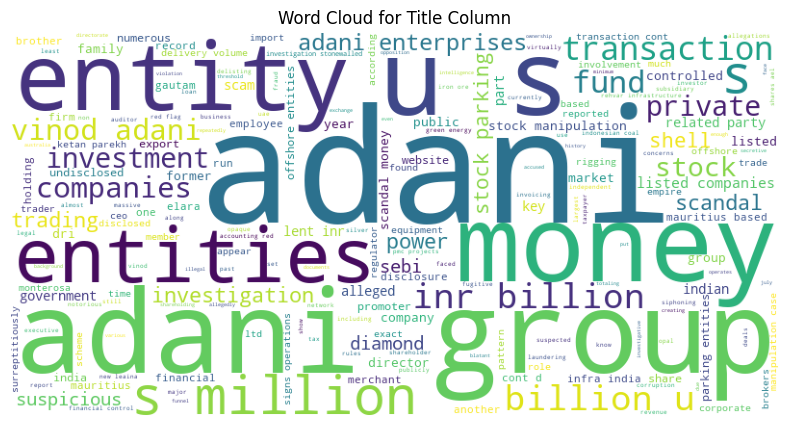

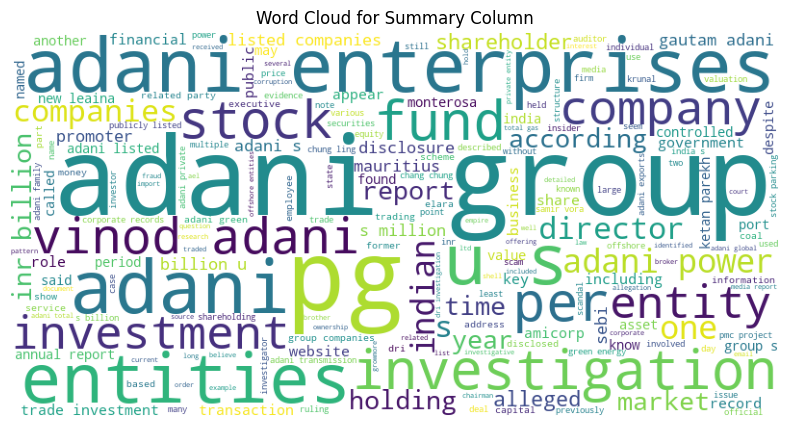

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine the 'title' and 'summary' columns into one
text = ' '.join(result['title']) + ' ' + ' '.join(result['summary'])

# Generate a word cloud for the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud for the title column
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title'])))
plt.axis('off')
plt.title('Word Cloud for Title Column')
plt.show()

# Plot the word cloud for the summary column
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['summary'])))
plt.axis('off')
plt.title('Word Cloud for Summary Column')
plt.show()

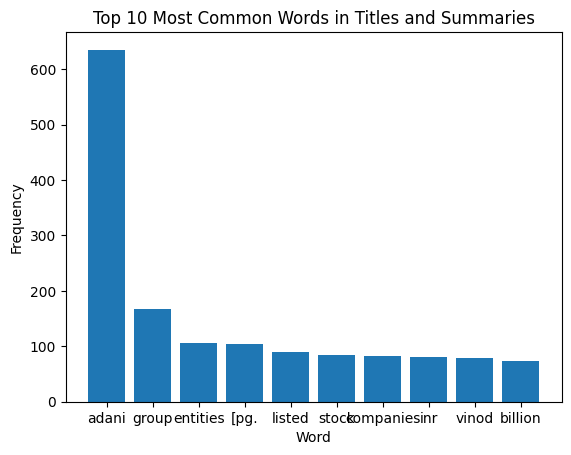

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate title and summary columns into one string
text = ' '.join(result['title'].tolist() + result['summary'].tolist())

# Remove stop words
stop_words = ['the', 'and', 'of', 'in', 'to', 'a', 'that', 'for', 'is', 'on', 'with', 'it', 'this', 'as', 'an', 'be', 'by', 'from']
words = [word for word in text.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Create a bar plot of the top 10 words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 Most Common Words in Titles and Summaries')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


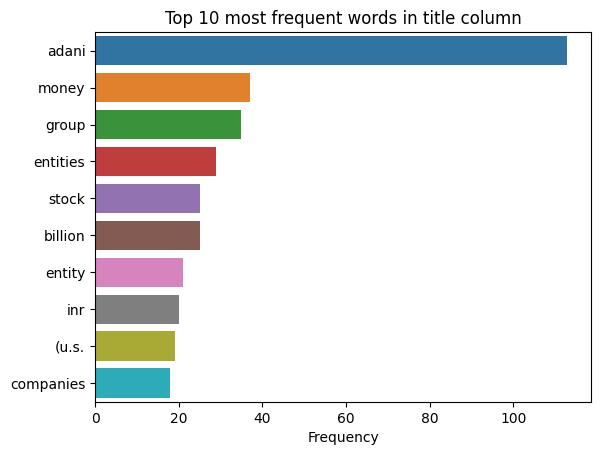

In [19]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_title_words = [word for title in result['title'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_title_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in title column')
plt.xlabel('Frequency')
plt.show()


In [20]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Get stop words and set up punctuation filter
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
extra_symbols = set(['‘', '’', '“', '”', '’s', '’t', '—', '–', '...'])

# Remove stop words and extra symbols from title column
result['title_clean'] = result['title'].apply(lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.lower() not in punctuation and word.lower() not in extra_symbols))

# Remove stop words and extra symbols from summary column
result['summary_clean'] = result['summary'].apply(lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.lower() not in punctuation and word.lower() not in extra_symbols))


In [21]:
result

,title,summary,source,title_clean,summary_clean
0,Carl Icahn's business empire became Hindenburg...,Research disclosed short position Carl Icahn's...,Yahoo News,carl icahn 's business empire became hindenbur...,research disclosed short position carl icahn '...
1,Adani Wilmar Q4 results: Profit Adani group fi...,Adani Wilmar said revenue operations dropped 7...,Yahoo News,adani wilmar q4 results profit adani group fir...,adani wilmar said revenue operations dropped 7...
2,Adani Power Q4 FY23 results: Net profit soars ...,"regulatory filing, company said consolidated t...",Yahoo News,adani power q4 fy23 results net profit soars r...,regulatory filing company said consolidated to...
3,"Adani Wilmar, Adani Enterprises, Adani Total, ...",Shares Adani Total Gas cracked 74.40 per cent ...,Yahoo News,adani wilmar adani enterprises adani total ada...,shares adani total gas cracked 74.40 per cent ...
4,"MSCI slashes free float 2 Adani firms, here's ...",battling stock market rout triggered Hindenbur...,Yahoo News,msci slashes free float 2 adani firms 's affec...,battling stock market rout triggered hindenbur...
...,...,...,...,...,...
146,adani group “harasses” critics “manipulates” c...,"adani group started series libel actions 2017,...",https://hindenburgresearch.com/adani,adani group harasses critics manipulates court...,adani group started series libel actions 2017 ...
147,conclusion: growth transparency,system broken corporate behemoths like adani g...,https://hindenburgresearch.com/adani,conclusion growth transparency,system broken corporate behemoths like adani g...
148,appendix 1: vinod adani’s involvement least 38...,cataloguing entire mauritius corporate registr...,https://hindenburgresearch.com/adani,appendix 1 vinod adani involvement least 38 ma...,cataloguing entire mauritius corporate registr...
149,disclosure: short adani group u.s.-traded bond...,,https://hindenburgresearch.com/adani,disclosure short adani group u.s.-traded bonds...,


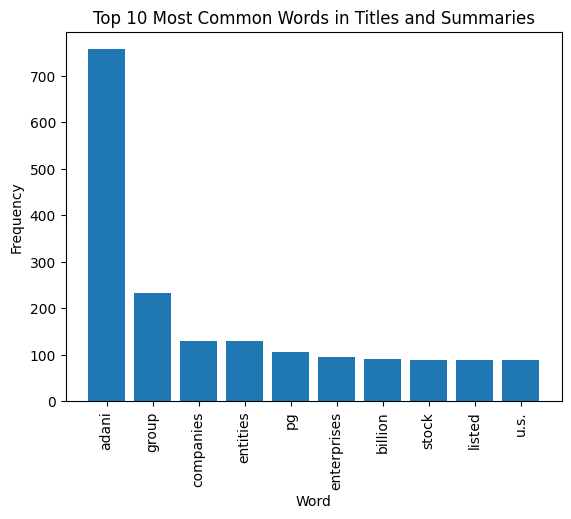

In [22]:
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate title and summary columns into one string
text = ' '.join(result['title_clean'].tolist() + result['summary_clean'].tolist())

# Remove stop words
stop_words = ['the', 'and', 'of', 'in', 'to', 'a', 'that', 'for', 'is', 'on', 'with', 'it', 'this', 'as', 'an', 'be', 'by', 'from']
words = [word for word in text.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Create a bar plot of the top 10 words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 Most Common Words in Titles and Summaries')
plt.xlabel('Word')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()


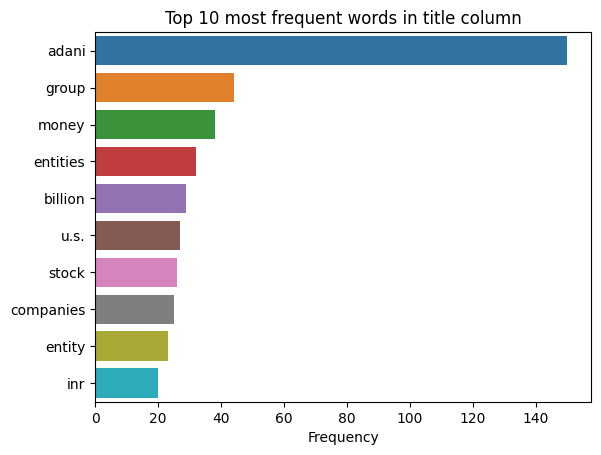

In [23]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_title_words = [word for title in result['title_clean'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_title_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in title column')
plt.xlabel('Frequency')
plt.show()


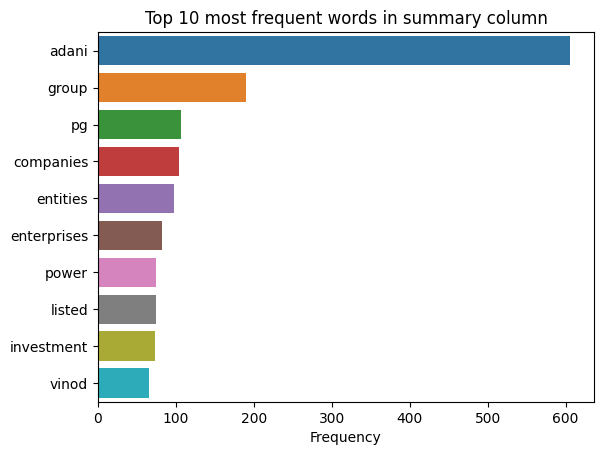

In [24]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_summary_words = [word for title in result['summary_clean'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_summary_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in summary column')
plt.xlabel('Frequency')
plt.show()


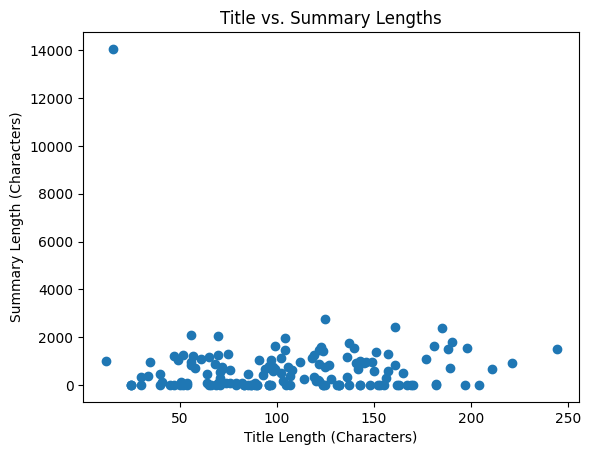

In [25]:
import matplotlib.pyplot as plt

title_lengths = result['title_clean'].str.len()
summary_lengths = result['summary_clean'].str.len()

fig, ax = plt.subplots()
ax.scatter(title_lengths, summary_lengths)
plt.title('Title vs. Summary Lengths')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Summary Length (Characters)')
plt.show()


In [31]:
# Print the info() method
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10 non-null     object
 1   summary  10 non-null     object
 2   source   10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes
None


In [27]:
# Print the describe() method
print(df_1.describe())

                                                    title  \
count                                                  10   
unique                                                 10   
top     Carl Icahn's business empire became Hindenburg...   
freq                                                    1   

                                                  summary      source  
count                                                  10          10  
unique                                                 10           1  
top     Research disclosed short position Carl Icahn's...  Yahoo News  
freq                                                    1          10  


In [28]:
# Print the head() method
print(df_1.head())

                                               title  \
0  Carl Icahn's business empire became Hindenburg...   
1  Adani Wilmar Q4 results: Profit Adani group fi...   
2  Adani Power Q4 FY23 results: Net profit soars ...   
3  Adani Wilmar, Adani Enterprises, Adani Total, ...   
4  MSCI slashes free float 2 Adani firms, here's ...   

                                             summary      source  
0  Research disclosed short position Carl Icahn's...  Yahoo News  
1  Adani Wilmar said revenue operations dropped 7...  Yahoo News  
2  regulatory filing, company said consolidated t...  Yahoo News  
3  Shares Adani Total Gas cracked 74.40 per cent ...  Yahoo News  
4  battling stock market rout triggered Hindenbur...  Yahoo News  


In [29]:
# Print the tail() method
print(df_1.tail())

                                               title  \
5  Adani Power Q4 profit grows 13 per cent Rs 5,2...   
6  Adani Enterprises share price surges 1% today ...   
7  Adani power Q4 results: Net profit rises 12.9 ...   
8          MSCI lower free float two Adani companies   
9  28% less earlier guidance: Adani flagship lowe...   

                                             summary      source  
5  Q4 FY23, APL achieved average consolidated PLF...  Yahoo News  
6  Adani Enterprises shares risen 13% past one mo...  Yahoo News  
7  Adani Power reported 12.9 percent rise net pro...  Yahoo News  
8  MSCI sees Adani Total Gas' free float 14% Adan...  Yahoo News  
9  Adani’s transportation vertical comprising air...  Yahoo News  


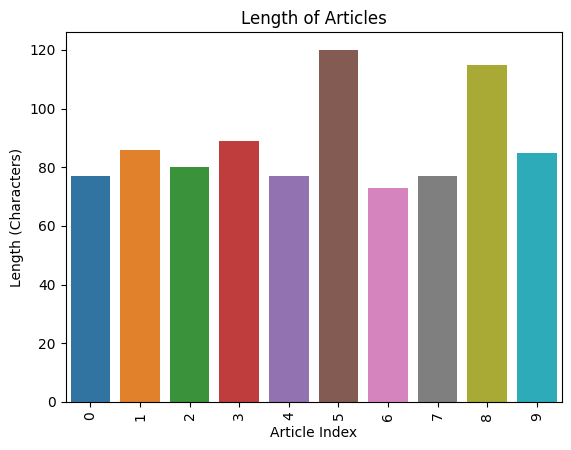

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

result['length'] = result['title_clean'].str.len() + result['summary_clean'].str.len()
df_1['length'] = df_1['summary'].apply(len)
sns.barplot(x=df_1.index, y='length', data=df_1)
plt.title('Length of Articles')
plt.xlabel('Article Index')
plt.xticks(rotation=90)
plt.ylabel('Length (Characters)')
plt.show()


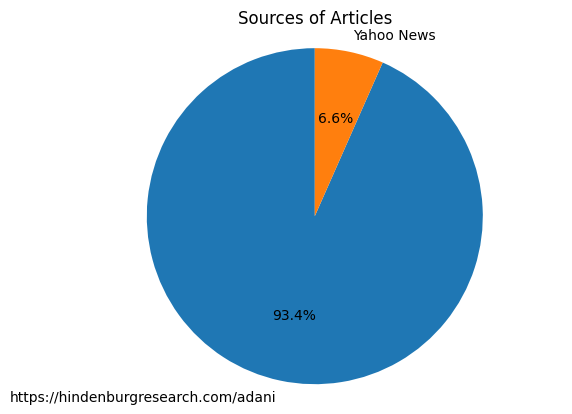

In [33]:
import matplotlib.pyplot as plt

source_counts = result['source'].value_counts()
labels = source_counts.index.tolist()
sizes = source_counts.values.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sources of Articles')
plt.show()


In [34]:
result.head()

,title,summary,source,title_clean,summary_clean,length
0,Carl Icahn's business empire became Hindenburg...,Research disclosed short position Carl Icahn's...,Yahoo News,carl icahn 's business empire became hindenbur...,research disclosed short position carl icahn '...,144
1,Adani Wilmar Q4 results: Profit Adani group fi...,Adani Wilmar said revenue operations dropped 7...,Yahoo News,adani wilmar q4 results profit adani group fir...,adani wilmar said revenue operations dropped 7...,157
2,Adani Power Q4 FY23 results: Net profit soars ...,"regulatory filing, company said consolidated t...",Yahoo News,adani power q4 fy23 results net profit soars r...,regulatory filing company said consolidated to...,165
3,"Adani Wilmar, Adani Enterprises, Adani Total, ...",Shares Adani Total Gas cracked 74.40 per cent ...,Yahoo News,adani wilmar adani enterprises adani total ada...,shares adani total gas cracked 74.40 per cent ...,164
4,"MSCI slashes free float 2 Adani firms, here's ...",battling stock market rout triggered Hindenbur...,Yahoo News,msci slashes free float 2 adani firms 's affec...,battling stock market rout triggered hindenbur...,127


In [35]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...


In [36]:
def get_sentiment_scores(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores


In [42]:
df_1['title_sentiment'] = df_1['title'].apply(get_sentiment_scores)
df_1['summary_sentiment'] = df_1['summary'].apply(get_sentiment_scores)


In [43]:
# df_1['title_sentiment'] = df_1['title_clean'].apply(get_sentiment_scores)
# df_1['summary_sentiment'] = df_1['summary_clean'].apply(get_sentiment_scores)

In [45]:
title_sentiment_avg = df_1['title_sentiment'].apply(lambda x: x['compound']).mean()
summary_sentiment_avg = df_1['summary_sentiment'].apply(lambda x: x['compound']).mean()

print("Title sentiment average:", title_sentiment_avg)
print("Summary sentiment average:", summary_sentiment_avg)


Title sentiment average: 0.3551000000000001
Summary sentiment average: 0.11510000000000001
